# Convolution

We are going to define convolution as operation of kernel $\omega$ (shaped $2a+1 \times 2b+1$) and image $f$ as
$$
g(x,y) = \omega * f(x,y) = \sum\limits_{i=-a}^a\sum\limits_{j=-b}^{b}\omega(i,j)f(x-i, y-j).
$$

It is evident that is is *local operation*, i.e. pixel of output $g(x,y)$ is a function of whole surroundings of f(x,y). (other types are *point-wise* and *global* operation on images).

Questions:
1. Give me an example of global and point-wise operations
1. Why we do not use kernels with even number of rows or columns?
1. How does the kernel $\omega$ shaped $3\times3$ look like, such that $\omega * f(x,y) = f(x,y)$?

In [107]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np

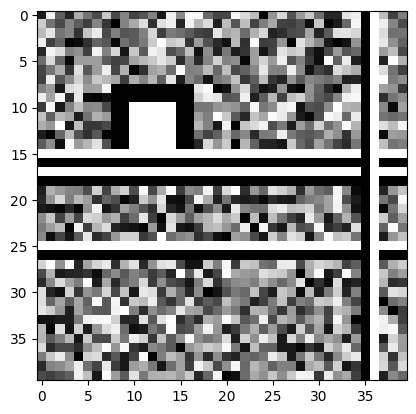

In [108]:
# I will generate the following example image, but feel free to use something else
img = 1.0*np.random.rand(40,40)
img[8:17, 8:17] = 0.0
img[10:15, 10:15] = 1.0
img[[15,17,25], :] = 1.0
img[[16,18,26], :] = 0
img[:, 35] = 0
img[:, 36] = 1.0

plt.imshow(img, cmap="gray", vmin=0.0, vmax=1.0)


## Most common kernels and their usage follows

### Identity
$$
\omega = \begin{bmatrix}
    0 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 0
\end{bmatrix}
$$

In [109]:
kernel = np.zeros(shape=(3,3), dtype=np.float64)
kernel[1,1] = 1
kernel

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [110]:
img_identity = cv.filter2D(img, -1, kernel, borderType=cv.BORDER_CONSTANT)

Text(0.5, 1.0, 'Convolved')

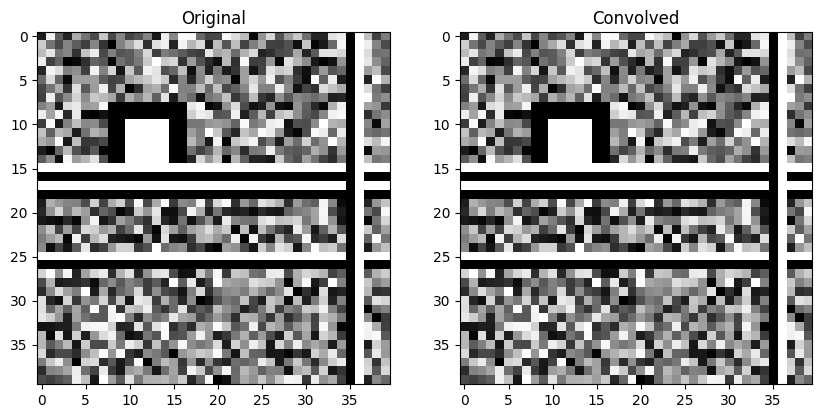

In [111]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img, cmap="gray", vmin=0.0, vmax=1.0)
ax1.set_title("Original")
ax2.imshow(img_identity, cmap="gray", vmin=0.0, vmax=1.0)
ax2.set_title("Convolved")

### Bluring image via box and gaussian blur
$$
\omega_{box} = \frac{1}{9}\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
\end{bmatrix},
\omega_{gauss} = \frac{1}{16}\begin{bmatrix}
    1 & 2 & 1 \\
    2 & 4 & 2 \\
    1 & 2 & 1
\end{bmatrix}
$$

Questions:
1. Does these operations look as something in statistics?
1. What *distributions* are connected to these kernels?

Text(0.5, 1.0, 'Convolved')

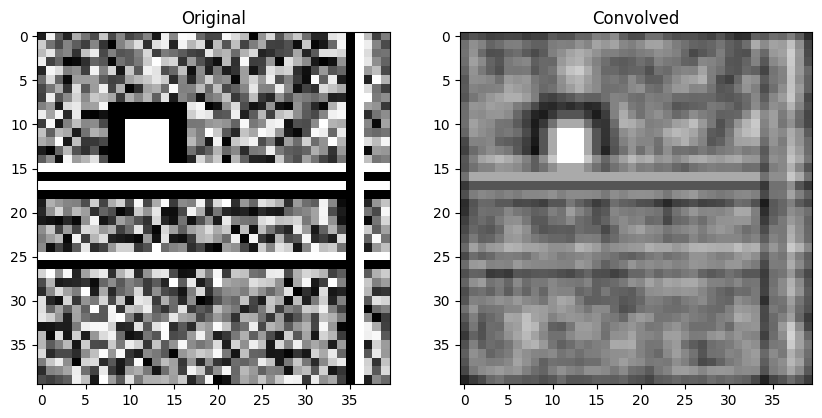

In [112]:
kernel = 1/9. * np.full(shape=(3,3), fill_value=1, dtype=np.float64)
img_box = cv.filter2D(img, -1, kernel, borderType=cv.BORDER_CONSTANT)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img, cmap="gray", vmin=0.0, vmax=1.0)
ax1.set_title("Original")
ax2.imshow(img_box, cmap="gray", vmin=0.0, vmax=1.0)
ax2.set_title("Convolved")

Text(0.5, 1.0, 'Convolved')

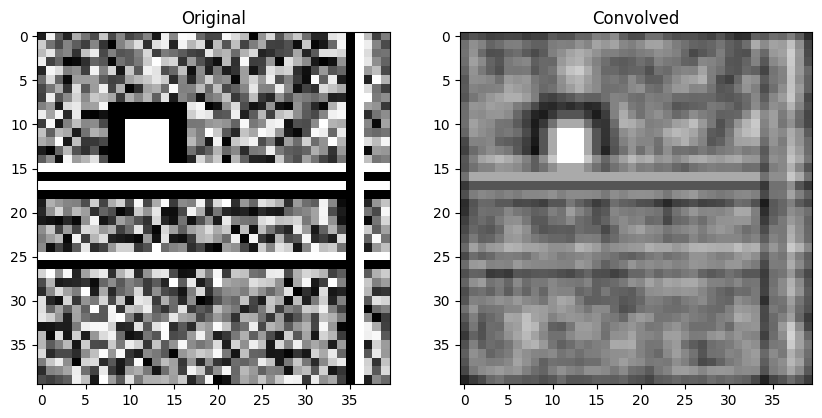

In [113]:
kernel = 1/16. * np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1],
], dtype=np.float64)
img_gauss = cv.filter2D(img, -1, kernel, borderType=cv.BORDER_CONSTANT)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img, cmap="gray", vmin=0.0, vmax=1.0)
ax1.set_title("Original")
ax2.imshow(img_box, cmap="gray", vmin=0.0, vmax=1.0)
ax2.set_title("Convolved")

### Comparison to build-in open-cv functions for averaging
Questions:
1. Can median blur be implemented as convolution operation?
1. What is median blur usefull for?

In [114]:
cv_box_blur = cv.blur(img, (3,3), borderType=cv.BORDER_CONSTANT) # equivalent to cv.boxFilter()
cv_gauss_blur = cv.GaussianBlur(img, (3,3), 0, borderType=cv.BORDER_CONSTANT)
cv_median_blur = cv.medianBlur(img.astype('float32'), 3) # median blur is not implemented for double

Text(0.5, 1.0, 'Median')

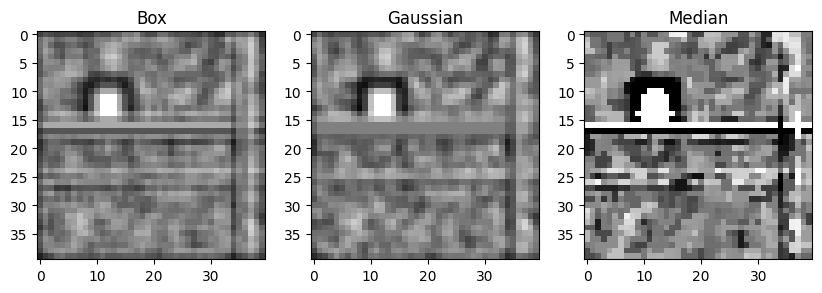

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,4))
ax1.imshow(cv_box_blur, cmap="gray", vmin=0.0, vmax=1.0)
ax1.set_title("Box")
ax2.imshow(cv_gauss_blur, cmap="gray", vmin=0.0, vmax=1.0)
ax2.set_title("Gaussian")
ax3.imshow(cv_median_blur, cmap="gray", vmin=0.0, vmax=1.0)
ax3.set_title("Median")

### Aproximation of derivatives
Consider the followint two kernels (horizontal and vertical):
$$
\omega_{h} = \begin{bmatrix}
    1 & 0 & -1 \\
    2 & 0 & -2 \\
    1 & 0 & -1
\end{bmatrix},
\omega_{v} = \frac{1}{16}\begin{bmatrix}
    1 & 2 & 1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1
\end{bmatrix}
$$

Text(0.5, 1.0, 'Convolved')

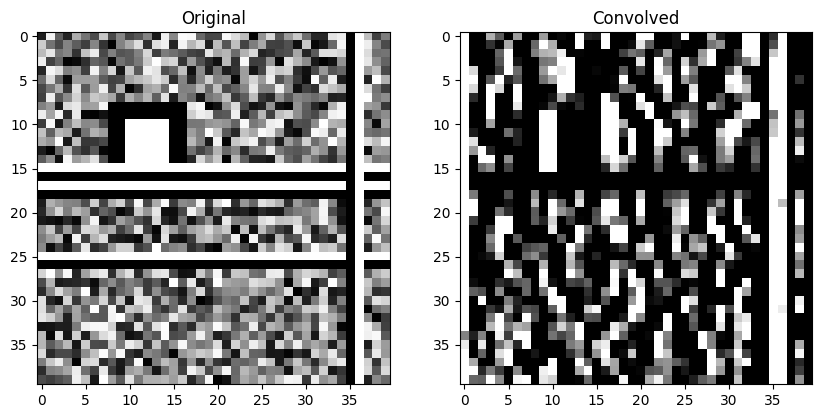

In [116]:
kernel_h = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
], dtype=np.float64)
img_horizontal = cv.filter2D(img, -1, cv.flip(kernel_h, -1), borderType=cv.BORDER_CONSTANT)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img, cmap="gray", vmin=0.0, vmax=1.0)
ax1.set_title("Original")
ax2.imshow(img_horizontal, cmap="gray", vmin=0.0, vmax=1.0)
ax2.set_title("Convolved")

Text(0.5, 1.0, 'Convolved')

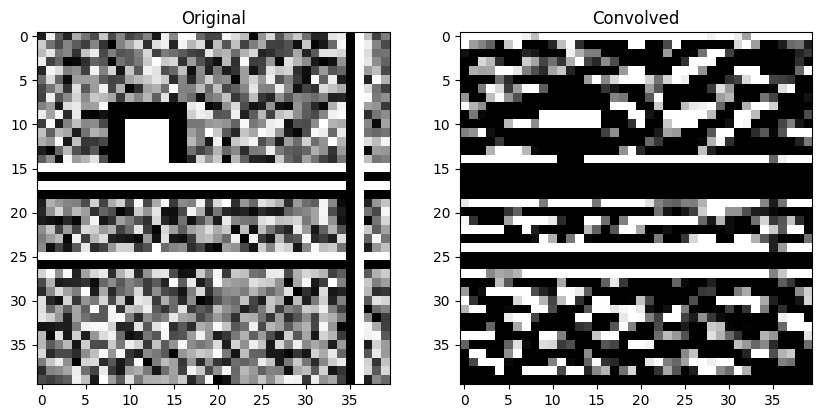

In [117]:
kernel_v = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1],
], dtype=np.float64)
img_vertical = cv.filter2D(img, -1, cv.flip(kernel_v, -1), borderType=cv.BORDER_CONSTANT)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img, cmap="gray", vmin=0.0, vmax=1.0)
ax1.set_title("Original")
ax2.imshow(img_vertical, cmap="gray", vmin=0.0, vmax=1.0)
ax2.set_title("Convolved")

### Sobel operator

Sobel operator is then defined as
$$
S = \sqrt{G_h^2 + G_v^2},
$$
where $G_h$ and $G_v$ are results of applying horizonatl and vertical kernels, respectivelly.


Text(0.5, 1.0, 'Convolved')

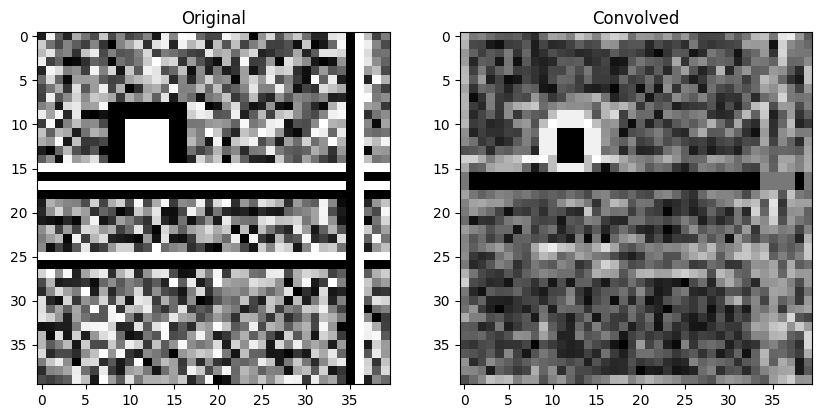

In [118]:
img_sobel = np.sqrt(np.power(img_horizontal, 2) + np.power(img_vertical, 2))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img, cmap="gray", vmin=0.0, vmax=1.0)
ax1.set_title("Original")
ax2.imshow(img_sobel, cmap="gray")
ax2.set_title("Convolved")

Text(0.5, 1.0, 'Sobel')

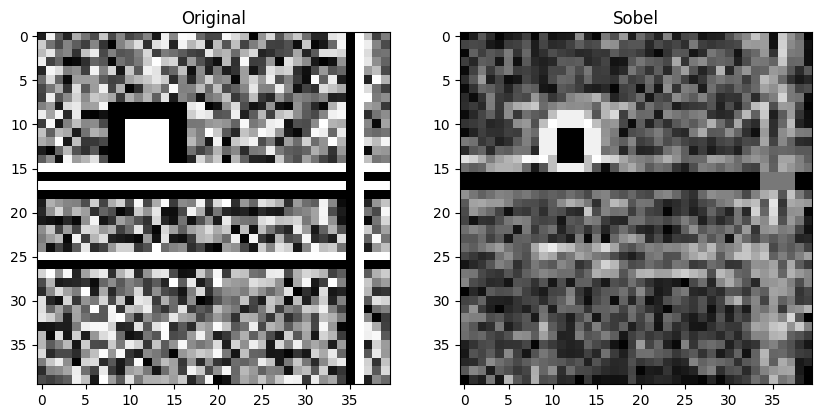

In [119]:
cv_sobel_h = cv.Sobel(img, cv.CV_64F, 1, 0)
cv_sobel_v = cv.Sobel(img, cv.CV_64F, 0, 1)
cv_sobel = np.sqrt(np.power(cv_sobel_h, 2) + np.power(cv_sobel_v, 2))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(img, cmap="gray", vmin=0.0, vmax=1.0)
ax1.set_title("Original")
ax2.imshow(cv_sobel, cmap="gray")
ax2.set_title("Sobel")

Questions:
1. Why different range for sobel operation result than $(0,1)$ and how to fix?
1. For what it could be usefull?

### Task
Perform the sobel operation on the `data/zebra.jpg`

In [120]:
zebra_path = os.path.join("data", "zebra.jpg")
zebra = cv.cvtColor(cv.imread(zebra_path), cv.COLOR_BGR2GRAY)
img = zebra.astype(np.float64) / 255.

Text(0.5, 1.0, 'Sobel')

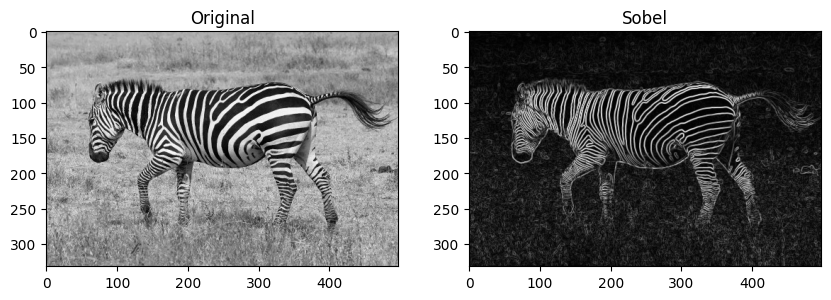

In [121]:
cv_sobel_h = cv.Sobel(img, cv.CV_64F, 1, 0)
cv_sobel_v = cv.Sobel(img, cv.CV_64F, 0, 1)
cv_sobel = np.sqrt(np.power(cv_sobel_h, 2) + np.power(cv_sobel_v, 2))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(zebra, cmap="gray")
ax1.set_title("Original")
ax2.imshow(cv_sobel, cmap="gray")
ax2.set_title("Sobel")